In [1]:
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr, fisher_exact, f, t
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
plt.style.use('ggplot')

In [3]:
x = np.array([[79], [91], [77], [87], [84], [76], [84], [94], [79], [98], [81], [115]])
x_ = np.array([79, 91, 77, 87, 84, 76, 84, 94, 79, 98, 81, 115])
y = np.array([134,154,128,138,133,144,160,149,125,163,120,162])

In [4]:
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)
print('Коэффициенты уравнения регрессии: {0}'.format(model.coef_))
print('Свободный член уравнения: {0}'.format(model.intercept_))

Коэффициенты уравнения регрессии: [0.95453718]
Свободный член уравнения: 59.37572078907435


In [5]:
print('Линейный коэффициент парной корреляции: {0}'.format(pearsonr(x_, y)[0]))
print('Коэффициент детерминации: {0}'.format(model.score(x, y)))
print('Средняя ошибка аппроксимации: {0}'.format(np.sum(np.abs((y - y_pred) / y)) / len(y) * 100))

Линейный коэффициент парной корреляции: 0.708928585486849
Коэффициент детерминации: 0.5025797393203846
Средняя ошибка аппроксимации: 5.927933469453753


In [6]:
f_stat = (model.score(x, y)) / (1 - model.score(x, y)) * (len(y) - 2)
f_crit = f.ppf(0.950, 1, len(y) - 2)

print('Значения статистики: {0}'.format(f_stat))
print('Критическое значение статистики: {0}'.format(f_crit))

Значения статистики: 10.103724738387614
Критическое значение статистики: 4.9646027437307145


Значение статистики больше критического значения, а значит нулевую гипотезу об отсутствии связи признаков отклонили

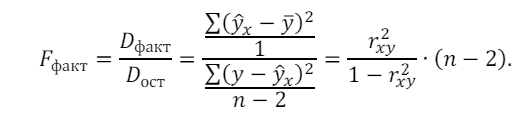

In [7]:
m_b = np.sqrt(np.sum((y - y_pred) ** 2) / ((len(y) - 2) * np.sum((x_ - x_.mean()) ** 2)))
m_a = np.sqrt(np.sum((y - y_pred) ** 2) / (len(y) - 2)) * np.sqrt(np.sum(x_ ** 2) / (len(y) * np.sum((x_ - x_.mean()) ** 2)))

t_b = model.intercept_ / m_a
t_a = model.coef_[0] / m_b

t_crit = t.ppf(0.975, len(y) - 2)

print('Статистическая значимость коэффициента регрессии: {0}'.format(t_a))
print('Статистическая значимость свободного члена регрессии: {0}'.format(t_b))

print('Критическое значение t-статистики: {0}'.format(t_crit))

Статистическая значимость коэффициента регрессии: 3.178635672483969
Статистическая значимость свободного члена регрессии: 2.253565560331556
Критическое значение t-статистики: 2.2281388519649385


Все статистики больше критического значения, а значит параметры регрессии статистически значимы

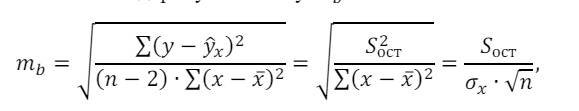

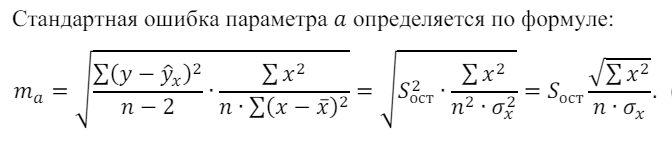

In [8]:
x_for = [[x_.mean() * 1.07]]
y_for = model.predict(x_for)

se = np.sqrt(np.sum((y - y_pred) ** 2) / (len(y) - 2)) * np.sqrt(1 + 1 / len(y) + (x_for[0][0] - x_.mean()) ** 2 / (np.sum((x_ - x_.mean()) ** 2)))
print('Доверительный интервал: ({0}, {1})'.format(y_for[0] - t.ppf(0.975, len(y) - 2) * se, y_for[0] + t.ppf(0.975, len(y) - 2) * se))
print('Прогнозное значение: {0}'.format(y_for[0]))

Доверительный интервал: (122.19371718184877, 174.44368190768083)
Прогнозное значение: 148.3186995447648


Прогнозное значение попало в наш доверительный интервал

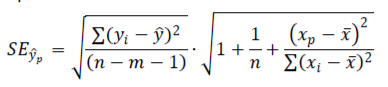

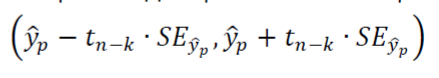

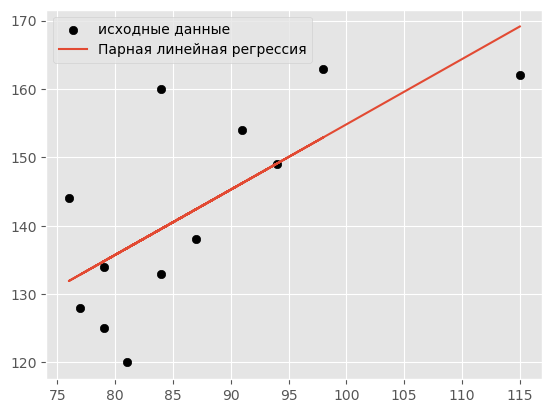

In [10]:
plt.scatter(x_, y, color = 'black')
plt.plot(x_, y_pred)
plt.legend(['исходные данные', 'Парная линейная регрессия'])
plt.show()